# Preparing the tools 

    

In [1]:
#Regular EDA and plotting libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

#Models from scikit learn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

#Models for Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Exploring our data

In [2]:
#load data set
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\JAGRITI\GRIP\tsf task 1.csv', encoding = 'latin')
df.shape

(25, 2)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


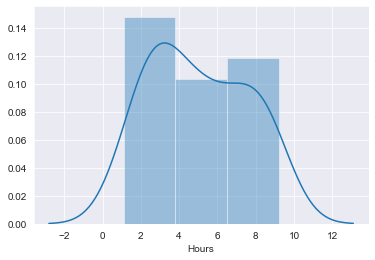

In [7]:
sns.set_style('darkgrid')
sns.distplot(df['Hours'],axlabel = 'Hours', label = 'no of hours');

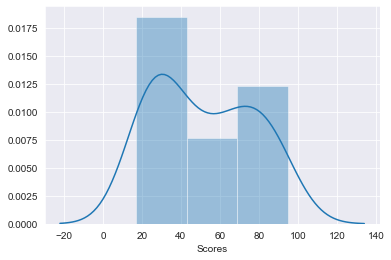

In [8]:
sns.distplot(df['Scores'], axlabel = 'Scores')

In [9]:
correlation_matrix = df[['Hours', 'Scores']].corr()
correlation_matrix

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


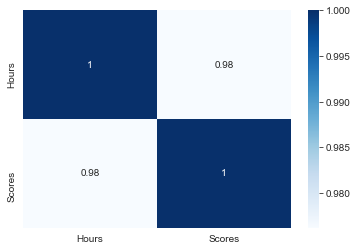

In [10]:
sns.set_style('darkgrid')
sns.heatmap(correlation_matrix, annot = True, cmap = 'Blues' );

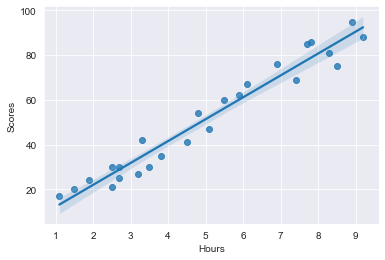

In [11]:
sns.set_style('darkgrid')
sns.regplot(x = 'Hours', y = 'Scores' , data = df, scatter = True);

# Modeling

In [12]:
x = df.drop('Scores', axis = 1)
y = df['Scores']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2 , random_state = 0)

In [14]:
#setting dictionary of models 
models = {'linearRegression' : LinearRegression(),
         'Ridge' : Ridge(),
         'RandomForestRegrssor' : RandomForestRegressor()}

model_score = {}

In [15]:
#loop through models 
for name,model in models.items():
    model.fit(x_train,y_train)
    model_score[name] = model.score(x_test,y_test)
    

model_score
    

{'linearRegression': 0.9454906892105355,
 'Ridge': 0.9469535028586777,
 'RandomForestRegrssor': 0.8090369024027102}

In [16]:
model_scores_df = pd.DataFrame(model_score.values(),
                              model_score.keys(),
                              columns = ['Accuracy'])
model_scores_df

,Accuracy
linearRegression,0.945491
Ridge,0.946954
RandomForestRegrssor,0.809037


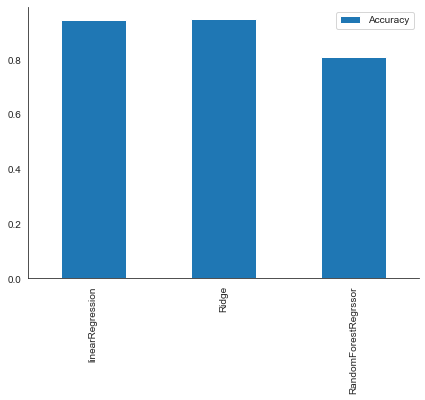

In [56]:
sns.set_style('white')
plot = model_scores_df.plot(kind = 'bar', figsize = (7,5))
sns.despine();

Since the accuracy of RandomForestScore came out to be least we will proceed further with either `Ridge` or `LinearRegression`
Here , we will proceed further with `LinearRegression` first

## Linear Regression

In [18]:
#to get the coefficients 
np.random.seed(42)
regressor = LinearRegression()
regressor.fit(x_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns , columns = ['Coeffcient'])
coeff_df

,Coeffcient
Hours,9.910656


In [20]:
print(regressor.intercept_)

2.018160041434669


In [21]:
y_pred = regressor.predict(x_test)

In [22]:
comaprison_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
comaprison_df


,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


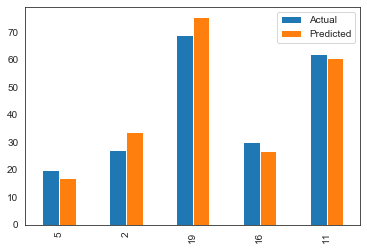

In [23]:
comaprison_df.plot(kind = 'bar');

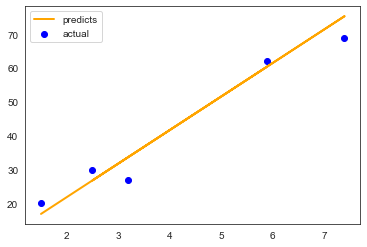

In [24]:
plt.scatter(x = x_test,y = y_test, color = 'blue')
plt.plot(x_test,y_pred, color = "orange", linewidth = 2)
plt.legend(['predicts','actual'])

**Evaluation**

In [25]:
r2 = r2_score(y_test, y_pred)
r2

0.9454906892105355

In [26]:
mae = mean_absolute_error(y_test,y_pred)
mae

4.18385989900298

In [27]:
mse = mean_squared_error(y_test,y_pred)
mse

21.598769307217413

## Ridge

In [28]:
ridge = Ridge()

In [29]:
ridge.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
print(ridge.coef_)

[9.83109627]


In [31]:
print(ridge.intercept_)

2.4350555519876735


In [32]:
rg_y_pred = ridge.predict(x_test)
rg_y_pred

array([17.18169996, 33.89456361, 75.18516794, 27.01279622, 60.43852354])

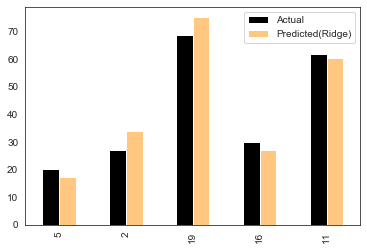

In [57]:
rg_comparison = pd.DataFrame({'Actual' : y_test, 'Predicted(Ridge)' : rg_y_pred})
rg_comparison.plot(kind = 'bar', colormap = 'copper');

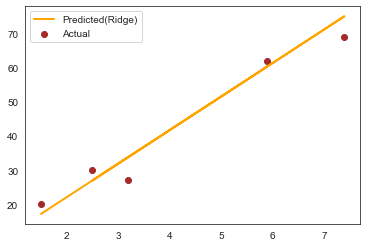

In [34]:
plt.scatter(x_test,y_test,color = 'Brown')
plt.plot(x_test,rg_y_pred, color = 'Orange', linewidth = 2)
plt.legend(['Predicted(Ridge)' ,'Actual']);

**Evaluation**

In [35]:
rg_r2 = r2_score(y_test,rg_y_pred)
rg_r2

0.9469535028586777

In [36]:
rg_mse = mean_squared_error(y_test,rg_y_pred)
rg_mse

21.01914402727752

In [37]:
rg_mae = mean_absolute_error(y_test,rg_y_pred)
rg_mae

4.089342367221116

In [38]:
compare_evaluation  = pd.DataFrame([[0.9454906892105355,4.18385989900298,21.598769307217413],
                                    [.9469535028586777,4.089342367221116,21.01914402727752]],
                                    index = ['LinearRegrresor', 'Ridge'],
                                    columns = ['r2', 'mae', 'mse'])
compare_evaluation

,r2,mae,mse
LinearRegrresor,0.945491,4.183860,21.598769
Ridge,0.946954,4.089342,21.019144


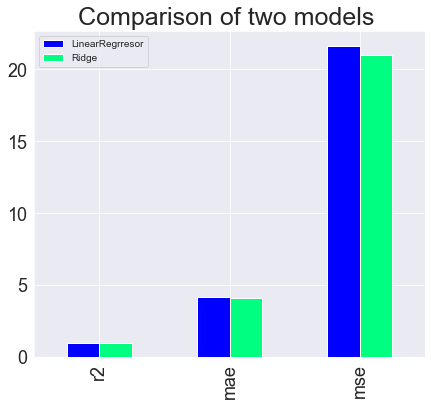

In [65]:
sns.set_style('darkgrid')
compare_evaluation.T.plot(kind = 'bar' , colormap = 'winter', figsize = (7,6),fontsize = 18)
plt.title('Comparison of two models ', fontsize = 25);


* **R2** tells how well your model is doing.
* **MAE** tells how far your model is from true value. 
* **MSE** amplifies large differences . 
   * *tid-bit : we have to minimize mae and mse while maximizing r2*.

* Though both of the models have performed same `mean_squared_error` is minimum in the case of `Ridge`.
 **Reason behind this is `Ridge` gives an estimate which minimizes the sum of square.**

###    **what will be predicted score in student studies for 9.25 hour?**

In [60]:
study_hour = float(input('Enter no of hours:'))
predict_score = regressor.predict([[study_hour]])
print(f'predicted score for { study_hour} by linear regression model is : {predict_score}')

Enter no of hours:9.25
predicted score for 9.25 by linear regression model is : [93.69173249]


In [59]:
rg_study_hour = float(input('How many hours does as student study'))
rg_predicted_score = ridge.predict([[rg_study_hour]])
print(f'predicted score for study {rg_study_hour} by ridge regression model is : {rg_predicted_score}')

How many hours does as student study9.25
predicted score for study 9.25 by ridge regression model is : [93.37269604]


# Conclusion : 
* Among all the linear regression models we tested i.e `LinearRegression` , `RandomForestRegressor`, `Ridge` -  `Ridge` performed best with accuracy of 94.69%
* Average hour of study for given 25 student batch is 2.5 hours with total deviation of 2.5 hour.
* Average score of the batch is 51.48 marks with overall deviation of 25.2 marks.
* our model can be represented as 
               y = b1x + bo
              where , y is score of student 
                      x is no. of hours they study 
                      b1 is coefficient 
                      and bo is intercept 
   * **b1(coefficient) = 9.83** ~ which indicated that by one extra hour of study scores can be improved by 9.83 marks 
   * **bo(intercept) = 2.43** ~ incase of zero hour of study student can score around 2.43 marks only.
* Predicted score of the dtudent who study for 9.25 hours is **93.372** (by ridge regression model).